<a href="https://colab.research.google.com/github/AlekseevaTatiana23/Python_Libraries_for_DS/blob/main/ht10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 10. Практическое применение метода K-Means. Иерархическая кластеризация
Цель: Проанализировать данные о заработной плате сотрудников из файла ds_salaries.csv и построить модели машинного обучения для прогнозирования заработной платы.

Задачи:

1. Первичный анализ данных:
— Импортировать данные из файла ds_salaries.csv.
— Очистить данные от дубликатов и пропущенных значений.
— Исследовать типы данных, описательную статистику и корреляции между признаками.
— Визуализировать данные с помощью Matplotlib и Seaborn.

2. Построение модели линейной регрессии:
— Разделить данные на обучающую и тестовую выборки.
— Построить модель линейной регрессии для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
— Проанализировать значимость признаков и мультиколлинеарность.

3. Построение модели дерева решений:
— Построить модель дерева решений для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик RMSE и R-квадрат.
— Подберите гиперпараметры для модели дерево решений
— Визуализировать дерево решений.

4. Построение ансамблевой модели:
— Построить ансамблевую модель, используя Random Forest и Boosting.
— Сравнить качество ансамблевой модели с отдельными моделями.
— Оценить важность признаков в ансамблевой модели.

5. Понижение размерности:
— Применить Principal Component Analysis (PCA) для снижения размерности данных.
— Построить модель линейной регрессии с использованием данных, полученных после PCA.
— Сравнить качество модели с использованием исходных данных.

7. Кластеризация:
— Применить метод K-Means для кластеризации данных по заработной плате.
— Определить оптимальное количество кластеров.
— Проанализировать характеристики полученных кластеров.
— Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
— Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import plot_tree
import scipy.cluster.hierarchy as sch
from sklearn.metrics import calinski_harabasz_score
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score
from sklearn.cluster import AgglomerativeClustering, SpectralClustering

In [6]:
# Загрузим датасет
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Этот датасет содержит информацию о вакансиях и заработных платах в области данных за разные годы. Вот основные его характеристики:

- **work_year**: год работы или года, к которым относится запись.
- **experience_level**: уровень опыта (например, SE — Senior, MI — Mid-level, EN — Entry-level).
- **employment_type**: тип занятости (например, FT — полная занятость, CT — контракт).
- **job_title**: должность, например, Data Scientist, ML Engineer, Data Science Manager.
- **salary**: заработная плата в валюте, указанной в поле **salary_currency**.
- **salary_currency**: валюта, в которой указана зарплата (USD, EUR, INR и др.).
- **salary_in_usd**: конвертированная зарплата в долларах США для сравнения.
- **employee_residence**: страна проживания сотрудника (например, US, ES, CA).
- **remote_ratio**: доля работы, выполняемой удалённо (процент).
- **company_location**: местоположение компании.
- **company_size**: размер компании (например, L — large, M — medium, S — small).

Данный датасет позволяет анализировать уровень зарплат в зависимости от страны, опыта, типа работы и других факторов, а также отслеживать тренды по годам.

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [12]:
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(1171, 11)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


Данные охватывают период с 2020 по 2023 годы. Средняя зарплата, пересчитанная в доллары США (salary_in_usd), составляет приблизительно 137570 долларов, что соответствует типичным зарплатам высокооплачиваемых специалистов.

Столбец remote_ratio показывает долю удалённой работы, и его значения варьируются от 0 до 100. Максимальное значение в 100 может указывать на полностью удаленную работу. В среднем (mean) этот показатель равен примерно 46, что может указывать на смешанный характер работы (частично удаленная, частично офисная).

In [13]:
# Статистический анализ объектных признаков
df.describe(include='object').T

,count,unique,top,freq
experience_level,3755,4,SE,2516
employment_type,3755,4,FT,3718
job_title,3755,93,Data Engineer,1040
salary_currency,3755,20,USD,3224
employee_residence,3755,78,US,3004
company_location,3755,72,US,3040
company_size,3755,3,M,3153


In [14]:
# Проверка на NaN значения
df.isnull().any().any()

np.False_

In [15]:
# Выберем категориальные признаки:
df_categorical = df.select_dtypes(include='object')
df_categorical

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,EUR,ES,ES,L
1,MI,CT,ML Engineer,USD,US,US,S
2,MI,CT,ML Engineer,USD,US,US,S
3,SE,FT,Data Scientist,USD,CA,CA,M
4,SE,FT,Data Scientist,USD,CA,CA,M
...,...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,USD,US,US,L
3751,MI,FT,Principal Data Scientist,USD,US,US,L
3752,EN,FT,Data Scientist,USD,US,US,S
3753,EN,CT,Business Data Analyst,USD,US,US,L


In [16]:
df_categorical.describe()

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


- **experience_level** (уровень опыта):
  - **unique**: всего 4 уникальных значения.
  - **top**: наиболее часто встречающееся значение — **SE**.
  - **freq**: число случаев, когда встречается **SE** — 2516.

- **employment_type** (тип занятости):
  - **unique**: 4 варианта.
  - **top**: наиболее распространенный тип — **FT**.
  - **freq**: количество случаев — 3718.

- **job_title** (должность):
  - **unique**: 93 различных должности.
  - **top**: наиболее часто встречается **Data Engineer**.
  - **freq**: число случаев — 1040.

- **salary_currency** (валюта зарплаты):
   - **unique**: 20 различных валют.
  - **top**: чаще всего — **USD**.
  - **freq**: 3224 случаев.

- **employee_residence** (страна проживания сотрудника):
  - **unique**: 78 стран.
  - **top**: наиболее распространена — **US**.
  - **freq**: 3004 случаев.

- **company_location** (место расположения компании):
  - **unique**: 72 страны/локации.
  - **top**: **US**.
  - **freq**: 3040.

- **company_size** (размер компании):
   - **unique**: 3 категории.
  - **top**: наиболее распространена — **M**.
  - **freq**: 3153.

Этот анализ показывает, что большинство вакансий — это позиции уровня Senior (SE), работающие на полную ставку (FT), с должностями вроде Data Engineer, в основном в США, с зарплатой в долларах США, в средних компаниях.

In [17]:
# Выборка зарплатных признаков
salary_features = ['salary', 'salary_currency', 'salary_in_usd']
df[salary_features]

,salary,salary_currency,salary_in_usd
0,80000,EUR,85847
1,30000,USD,30000
2,25500,USD,25500
3,175000,USD,175000
4,120000,USD,120000
...,...,...,...
3750,412000,USD,412000
3751,151000,USD,151000
3752,105000,USD,105000
3753,100000,USD,100000


Дополнительно

Чтобы точно сравнить зарплаты за разные годы, важно учитывать инфляцию. Инфляция - это скорость, с которой общий уровень цен на товары и услуги увеличивается с течением времени. Приведя зарплаты в соответствие с общей валютой и годом, мы можем провести значимые сравнения между ними.

Чтобы привести зарплаты за разные годы к их текущему значению для целей сравнения. Мы будем использовать набор данных, содержащий информацию о зарплатах сотрудников, годах работы и валюте.

Определить уровень инфляции для Соединенных Штатов (USA) и мировых рынков. Эти показатели будут использоваться для корректировки заработной платы в зависимости от года и валюты.

In [18]:
us_inflation_rates = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_inflation_rates = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}


def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary




df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,adjusted_salary
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,85847.0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,30000.0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,25500.0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,175000.0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,120000.0


In [20]:
df['job_title'].value_counts()

,count
job_title,
Data Engineer,1040
Data Scientist,840
Data Analyst,612
Machine Learning Engineer,289
Analytics Engineer,103
...,...
Principal Data Architect,1
Head of Machine Learning,1
Cloud Data Architect,1


In [21]:
def assign_broader_category(job_title):
    category_mapping = {
        "Data Engineering": ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"],
        "Data Science": ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"],
        "Machine Learning": ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"],
        "Data Architecture": ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"],
        "Management": ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    }

    for category, job_titles in category_mapping.items():
        if job_title in job_titles:
            return category

    return "Other"

In [22]:
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [23]:
df['job_category'].value_counts()

,count
job_category,
Data Engineering,1813
Data Science,985
Other,421
Machine Learning,327
Data Architecture,105
Management,104


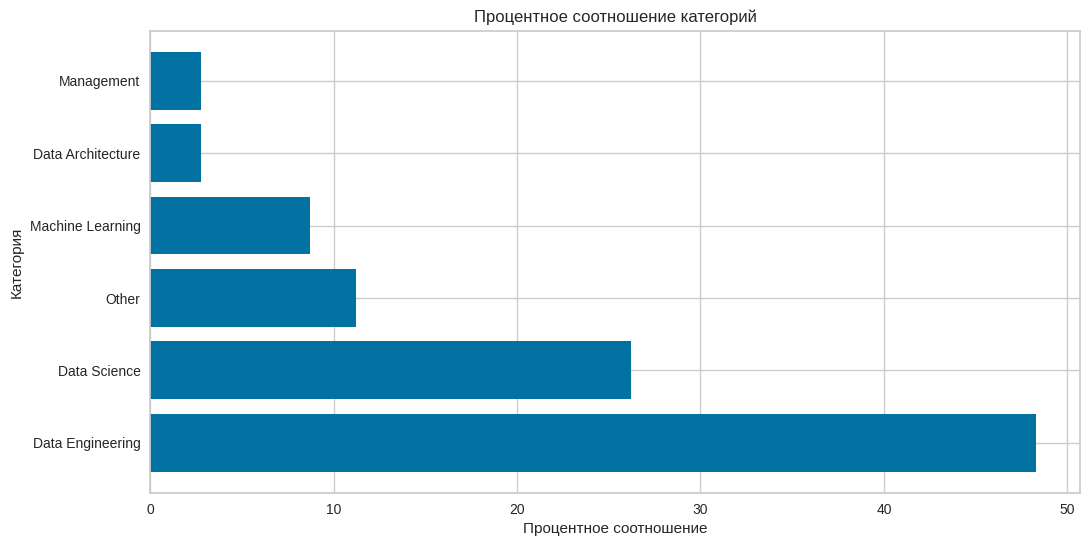

In [24]:
value_counts = df['job_category'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Процентное соотношение')
ax.set_ylabel('Категория')
ax.set_title('Процентное соотношение категорий')
plt.show()

Категория "Data Engineering" имеет самую большую долю, с процентом близким к 50%.

"Data Science" следует за ней с процентом, кажется, около 25%.

Категория "Other" представлена примерно 15%.

"Machine Learning" составляет чуть меньше 10%.

"Data Architecture" и "Management" занимают наименьший процент, обе категории находятся ниже 5%.

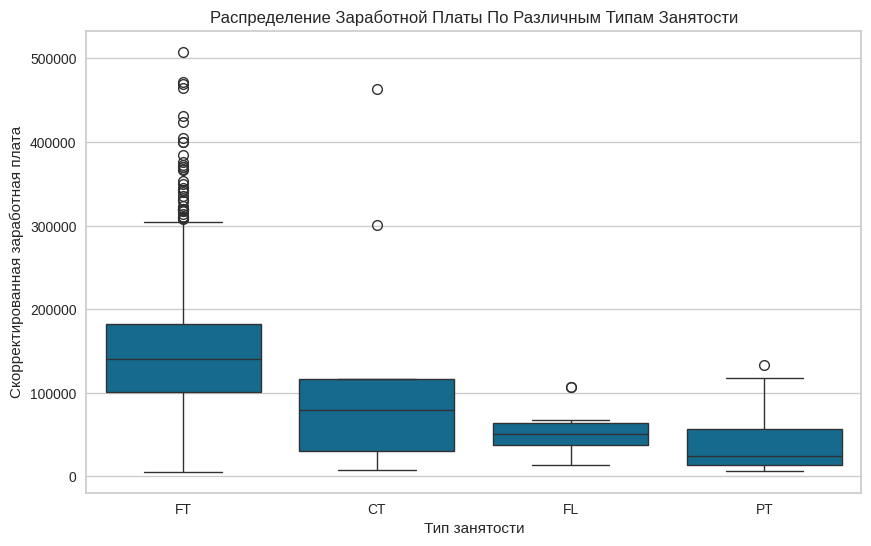

In [26]:
# Распределение заработной платы по различным типам занятости
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='adjusted_salary')
plt.title('Распределение Заработной Платы По Различным Типам Занятости')
plt.xlabel('Тип занятости')
plt.ylabel('Скорректированная заработная плата')
plt.show()

FT (Полный рабочий день):

Медиана заработной платы находится ближе к нижней части ящика, что указывает на то, что более 50% работников зарабатывают меньше средней заработной платы.
Распределение является асимметричным с правосторонней асимметрией, поскольку усы и выбросы (отдельные точки) простираются довольно высоко, что указывает на наличие значительного числа работников с зарплатой выше медианы.
Существует множество выбросов, показывающих индивидуальные случаи с исключительно высокими зарплатами по сравнению с основной массой данных.


CT (Контракт):

Медиана находится ближе к середине бокса, что указывает на более симметричное распределение заработной платы среди работников по контракту.
Распределение имеет меньше выбросов, чем в категории FT.


FL (Фриланс):

Медианная зарплата ниже, чем в предыдущих категориях, и расположена в верхней части ящика.
Диапазон (размах) зарплат в этой категории относительно узкий, и есть очень мало выбросов.


PT (Частичная занятость):

Медианная зарплата самая низкая среди всех категорий.
Ящик относительно узкий, что указывает на меньшее разнообразие в зарплатах.
Есть один выброс, показывающий зарплату, которая значительно превышает типичные значения для данной категории.

Text(0.5, 1.0, "Распределение ['adjusted_salary']")

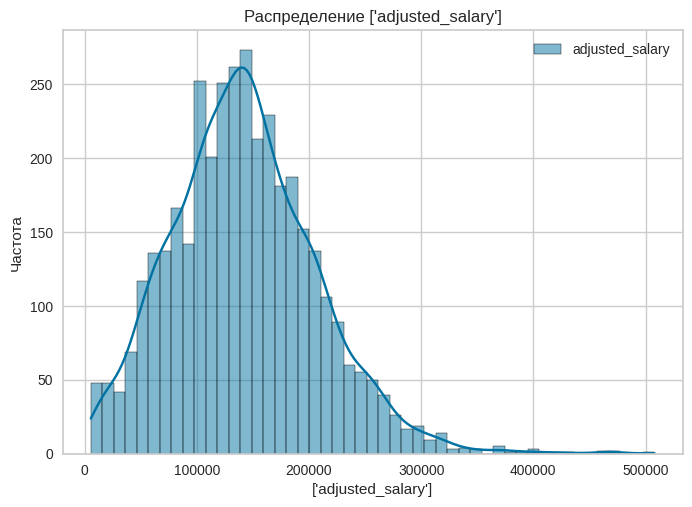

In [30]:
col = ['adjusted_salary']

# Построение гистограммы с KDE
sns.histplot(df[col], kde=True)
plt.xlabel(col)
plt.ylabel('Частота')
plt.title(f'Распределение {col}')


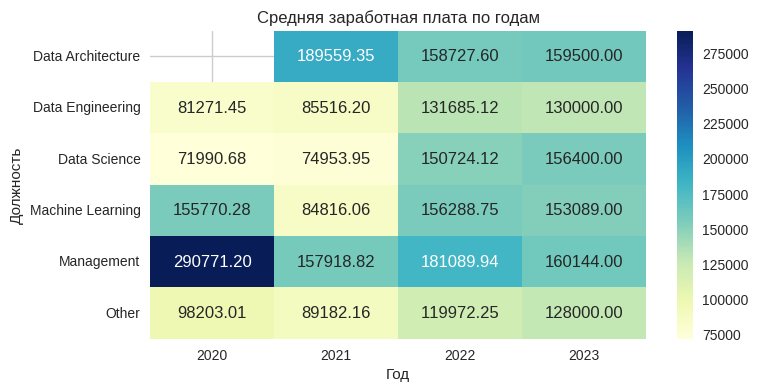

In [31]:
# Многомерный анализ
pivot_table = df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Средняя заработная плата по годам')
plt.xlabel('Год')
plt.ylabel('Должность')
plt.show()

Зарплаты в Management категории находятся на самом высоком уровне по сравнению с другими представленными специальностями. Они начинаются от порядка 257,600 в 2020 году и слегка снижаются до 160,144 в 2023 году.

Различия в остальных категориях менее значительны, однако каждая из них показывает рост медианной зарплаты с течением времени. Например, в Data Engineering зарплаты возросли с 72,000 в 2020 году до 130,000 в 2023 году.

В категории Machine Learning наблюдается рост с 138,000 в 2020 году до 153,089 в 2023 году.

В категории Data Science также виден постепенный рост: начиная от 62,726 в 2020 году и достигнув 156,400 в 2023 году.

Data Architecture и Other показывают стабильный рост медианной зарплаты с каждым годом, хотя они начинают и заканчивают период с самых низких показателей среди представленных групп.

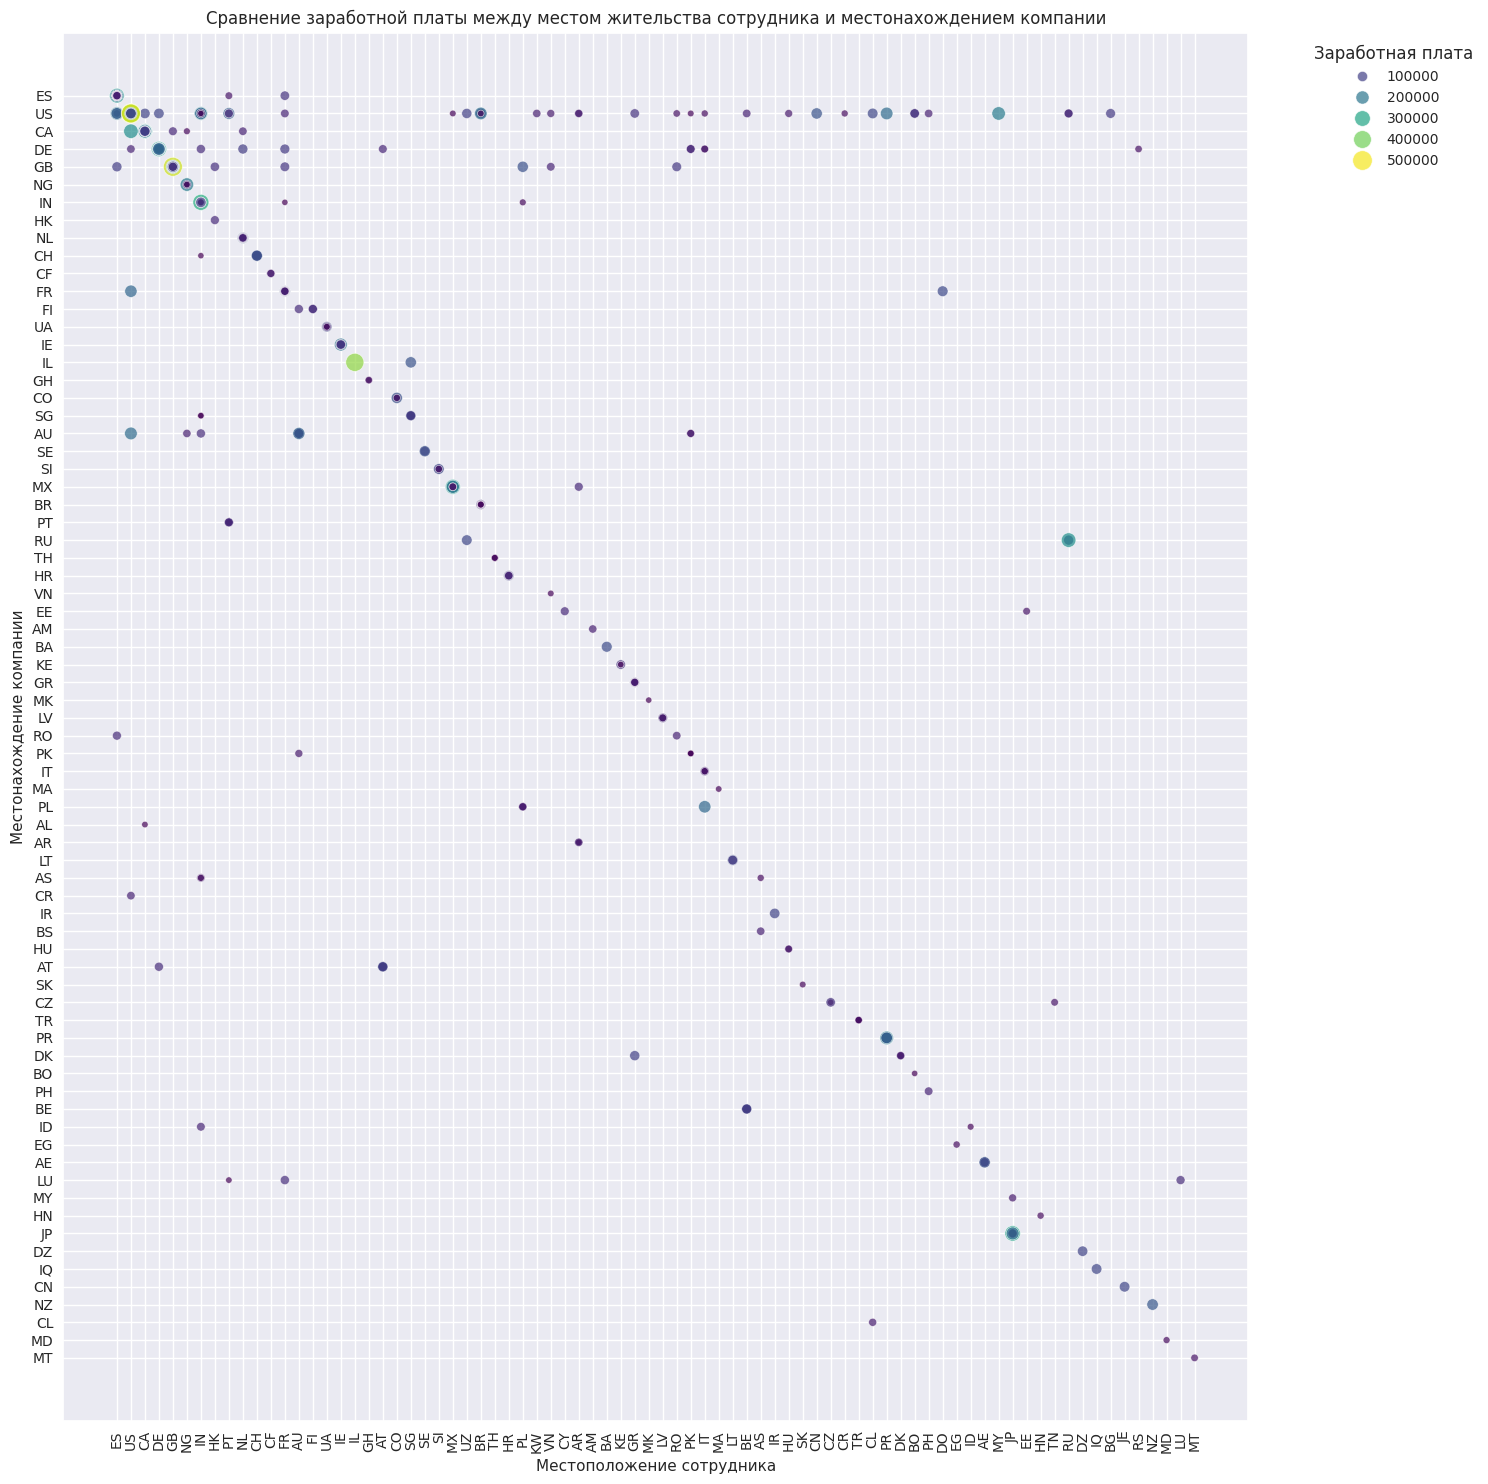

In [33]:
sns.set_style('darkgrid')

plt.figure(figsize=(15, 15))
sns.scatterplot(
    data=df,
    x='employee_residence',
    y='company_location',
    hue='adjusted_salary',
    size='adjusted_salary',
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)

plt.title('Сравнение заработной платы между местом жительства сотрудника и местонахождением компании')
plt.xlabel('Местоположение сотрудника')
plt.ylabel('Местонахождение компании')
plt.xticks(rotation=90)

# Обновлённая легенда
plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.2, 1),
    title='Заработная плата',
    fontsize='small'
)

plt.tight_layout()
plt.show()

In [34]:
# Стандартизация численных признаков и кодировка категориальных признаков
categorical_columns = ['experience_level', 'employment_type', 'remote_ratio','company_size','job_category']
numerical_columns = ['adjusted_salary']

In [35]:
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

In [36]:
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df[numerical_columns])

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [37]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)
processed_df = processed_df.drop(['work_year', 'salary','salary_in_usd'], axis=1)

In [38]:
processed_df_copy = processed_df.drop(processed_df.select_dtypes(include = 'object'), axis = 1)

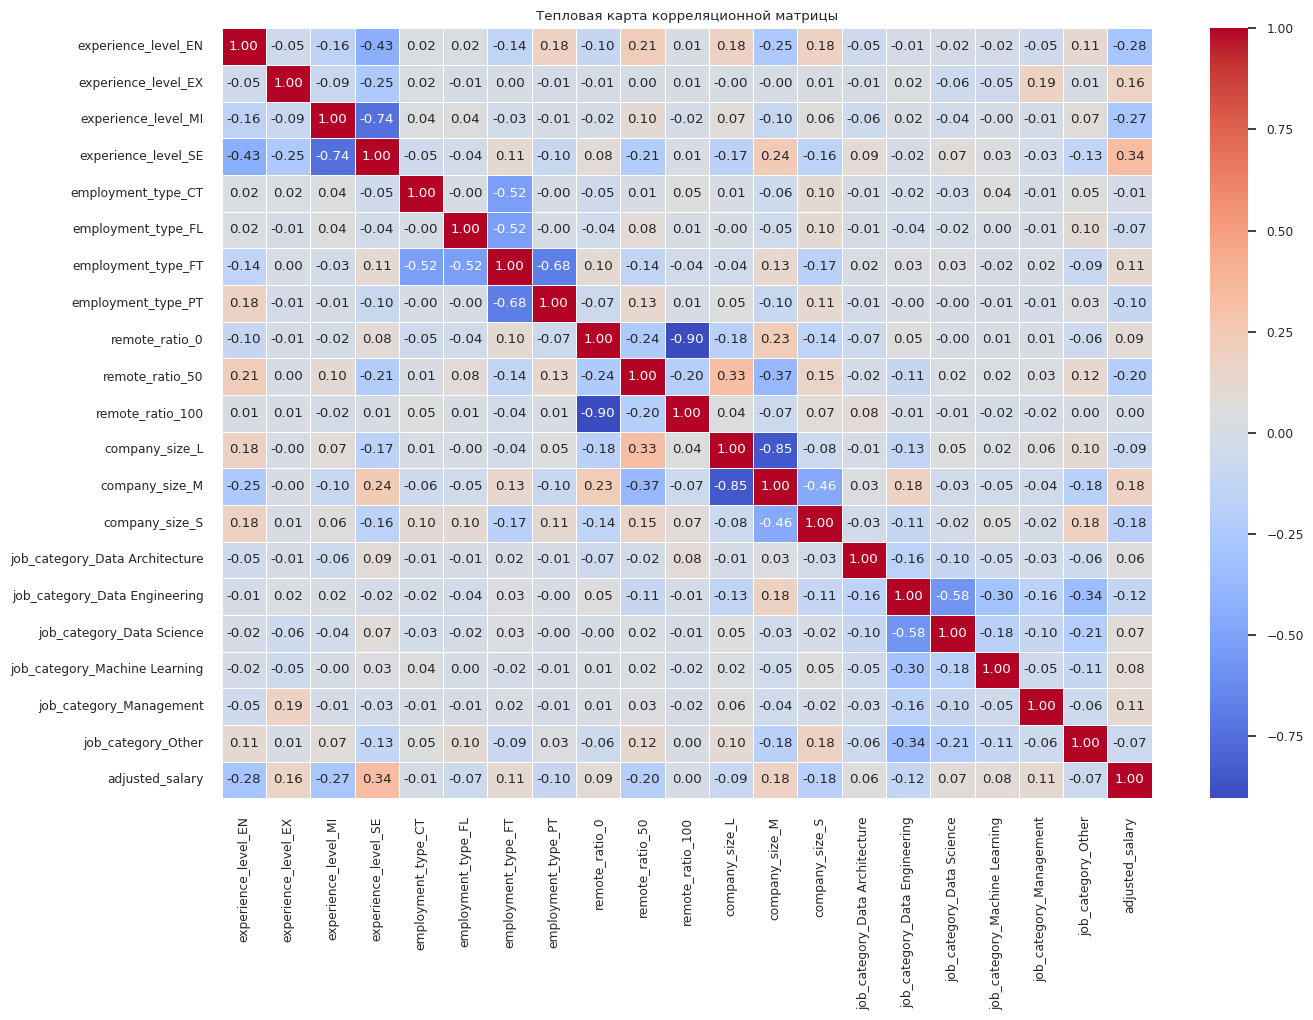

In [40]:
correlation_matrix = processed_df_copy.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

corr = processed_df_copy.corr()
target_corr = corr['adjusted_salary'].drop('adjusted_salary')

target_corr_sorted = target_corr.sort_values(ascending=False)


Положительные значения корреляции (красный цвет) показывают, что между параметром и заработной платой существует прямая связь: выше значение параметра, выше зарплата. Отрицательные значения корреляции (синий цвет) говорят о том, что между параметром и зарплатой обратная связь: выше значение параметра, ниже зарплата.

Наиболее значимые положительные корреляции:

experience_level_SE (0.34) - предположительно, уровень опыта Senior Engineer имеет сильную положительную корреляцию с заработной платой.
company_size_M (0.18) - размер компании средний (Medium) имеет умеренную положительную корреляцию с зарплатой.
experience_level_EX (0.16) - очень высокий уровень опыта (Expert) также имеет положительную корреляцию с зарплатой.
Наиболее значимые отрицательные корреляции:

experience_level_EN (-0.28) - начальный уровень опыта (Entry-level Engineer) имеет сильную отрицательную корреляцию с заработной платой.
experience_level_MI (-0.27) - средний уровень опыта (Mid-level Engineer) имеет также отрицательную корреляцию с заработной платой.
remote_ratio_50 (-0.20) и company_size_S (-0.18) - работа на 50% удаленно и небольшой размер компании имеют умеренно отрицательную корреляцию с зарплатой.
Другие параметры также имеют разные уровни корреляции с заработной платой, но их значения меньше по абсолютной величине, что указывает на менее сильную связь с зарплатой.

Построение модели линейной регрессии

In [41]:
processed_df_copy.head()

,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,remote_ratio_0,remote_ratio_50,...,company_size_L,company_size_M,company_size_S,job_category_Data Architecture,job_category_Data Engineering,job_category_Data Science,job_category_Machine Learning,job_category_Management,job_category_Other,adjusted_salary
0,False,False,False,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,-0.874881
1,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,-1.738143
2,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,-1.807703
3,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,0.503213
4,False,False,False,True,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,-0.346957


In [42]:
X = processed_df_copy.drop(['adjusted_salary'], axis=1)
y = processed_df_copy['adjusted_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print(f'MSE: {mean_squared_error(y_train, y_train_pred)},\
\nMAE: {mean_absolute_error( y_train, y_train_pred)},\
\nR2: {r2_score(y_train, y_train_pred)}')

MSE: 0.7536623415177856,
MAE: 0.6643744411999858,
R2: 0.24920640396820715


In [44]:
y_test_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error( y_test, y_test_pred)},\
\nMAE: {mean_absolute_error( y_test, y_test_pred)},\
\nR2: {r2_score(y_test, y_test_pred)}')

MSE: 0.7733925404650028,
MAE: 0.6888016301549116,
R2: 0.21344311163095364


Эти результаты несколько хуже, чем на обучающем наборе: коэффициент детерминации немного ниже (около 0.21), что означает, что модель несколько хуже объясняет вариативность тестовой выборки по сравнению с обучающей выборкой.

В целом, результаты указывают на то, что модель линейной регрессии не обеспечивает высокого качества прогнозирования для представленных данных, так как R2 довольно низкий как на обучающих, так и на тестовых данных. Это может говорить о том, что между предикторами и целевой переменной имеются нелинейные зависимости, или в данных недостаточно информации для обучения модели, или, возможно, потребуются более сложные модели для предсказания.

Анализ значимости признака и мультиколлинеарности

Чтобы проанализировать значимость признаков, можно посмотреть на коэффициенты модели линейной регрессии. Для выявления мультиколлинеарности рассчитайте коэффициент инфляции дисперсии (VIF).

In [45]:
# Значение признака

# Получение коэффициентов
coefficients = model.coef_
features = X.columns

# Отображение коэффициентов
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')

experience_level_EN: -0.7189656826608389
experience_level_EX: 0.9847389948013872
experience_level_MI: -0.47961926899985036
experience_level_SE: 0.21384595685930188
employment_type_CT: 0.4134203009970563
employment_type_FL: -0.4665897253817917
employment_type_FT: 0.23837458445260828
employment_type_PT: -0.18520516006787097
remote_ratio_0: 0.19233802621538149
remote_ratio_50: -0.34994227997815414
remote_ratio_100: 0.1576042537627739
company_size_L: 0.17871831703419952
company_size_M: 0.19893850324296314
company_size_S: -0.37765682027715775
job_category_Data Architecture: -0.0007167077563087514
job_category_Data Engineering: -0.27538182856641447
job_category_Data Science: -0.017432476056939598
job_category_Machine Learning: 0.14284547860479324
job_category_Management: 0.24425302817998396
job_category_Other: -0.09356749440511797


Полученные коэффициенты указывают на серьёзные проблемы с производительностью модели и качеством данных, что приводит к нереалистичным прогнозам заработной платы на основе категориальных признаков.

In [46]:
# Анализ мультиколлинеарности (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = features
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           Feature         VIF
0              experience_level_EN         inf
1              experience_level_EX         inf
2              experience_level_MI         inf
3              experience_level_SE  215.382194
4               employment_type_CT         inf
5               employment_type_FL         inf
6               employment_type_FT         inf
7               employment_type_PT         inf
8                   remote_ratio_0         inf
9                  remote_ratio_50         inf
10                remote_ratio_100         inf
11                  company_size_L         inf
12                  company_size_M         inf
13                  company_size_S         inf
14  job_category_Data Architecture         inf
15   job_category_Data Engineering         inf
16       job_category_Data Science         inf
17   job_category_Machine Learning         inf
18         job_category_Management         inf
19              job_category_Other         inf


Наличие бесконечных значений VIF указывает на серьёзную проблему мультиколлинеарности в нашем наборе данных, которую необходимо устранить, чтобы модель линейной регрессии работала надёжно.

Построение модели дерева решений

In [47]:
# Определение характеристик (X) и целевой переменной (y)
X = processed_df_copy[['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
         'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
         'remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100',
         'company_size_L', 'company_size_M', 'company_size_S']]
y = processed_df_copy['adjusted_salary']

# Разделение данных на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели дерева решений
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
# Модель прогнозирования
y_pred = model.predict(X_test)

# Вычисление метрик RMSE и R-квадрат
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r_squared}')

RMSE: 0.8983238896284343
R-squared: 0.18884082003330704


Вывод


RMSE

Значение RMSE, равное примерно 0,8983, говорит о том, что в среднем прогнозы, сделанные моделью, отклоняются от фактических значений заработной платы примерно на 0,8983 единицы (в том же масштабе, что и целевая переменная — скорректированная заработная плата).
Хотя RMSE позволяет оценить погрешность прогнозирования, его интерпретация зависит от контекста и масштаба данных. Если зарплаты исчисляются тысячами или десятками тысяч, RMSE можно считать относительно низким; однако, если действительные зарплаты на самом деле намного ниже, это может указывать на значительные погрешности прогнозирования.


R-квадрат

Значение R-квадрата, равное 0,1888, указывает на то, что примерно 18,88% дисперсии заработной платы можно объяснить характеристиками, включёнными в представленную модель.
Такое низкое значение R-квадрата говорит о том, что модель не объясняет значительную часть вариативности в прогнозах по зарплате, что указывает на то, что:

Выбранных функций может быть недостаточно для выявления закономерностей в данных.
Могут быть и другие важные функции, не включенные в модель.
Связь между предикторами и целевой переменной может быть нелинейной или недостаточно хорошо описываться деревом решений.

In [50]:
# Подбор гиперпараметров
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


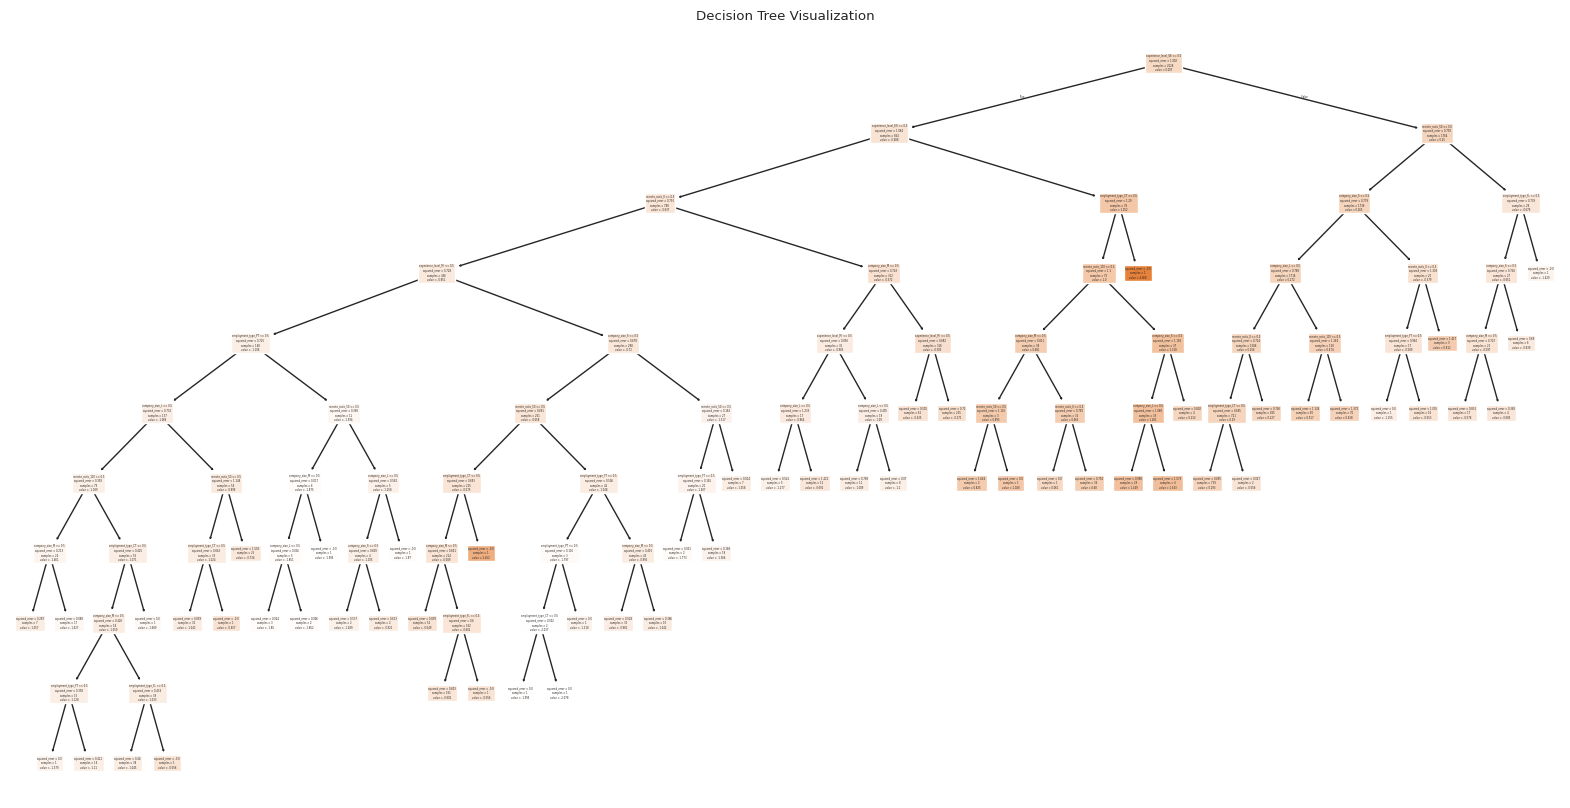

In [51]:
# Визуализация дерева

from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns)
plt.title("Decision Tree Visualization")
plt.show()

Построение ансамблевой модели

In [54]:
# Модель Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r_squared = r2_score(y_test, rf_y_pred)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest R-squared: {rf_r_squared}')

Random Forest RMSE: 0.8979781870536034
Random Forest R-squared: 0.18946501774924795


In [56]:
# Модель Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

gb_y_pred = gb_model.predict(X_test)

gb_rmse = np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_r_squared = r2_score(y_test, gb_y_pred)

print(f'Gradient Boosting RMSE: {gb_rmse}')
print(f'Gradient Boosting R-squared: {gb_r_squared}')

Gradient Boosting RMSE: 0.8958431833956941
Gradient Boosting R-squared: 0.1933146390261652


In [57]:
print(f'Decision Tree RMSE: {rmse}')
print(f'Decision Tree R-squared: {r_squared}')

print(f'Random Forest RMSE: {rf_rmse}, R-squared: {rf_r_squared}')
print(f'Gradient Boosting RMSE: {gb_rmse}, R-squared: {gb_r_squared}')

Decision Tree RMSE: 0.8983238896284343
Decision Tree R-squared: 0.18884082003330704
Random Forest RMSE: 0.8979781870536034, R-squared: 0.18946501774924795
Gradient Boosting RMSE: 0.8958431833956941, R-squared: 0.1933146390261652


На основе предоставленных метрик для трех моделей (Decision Tree, Random Forest и Gradient Boosting) можно сделать следующие выводы:

1. **RMSE (Среднеквадратическая ошибка)**:
   - Все три модели показывают схожие значения RMSE, примерно около 0.898. Это указывает на то, что в среднем ошибки предсказаний у моделей похожи и составляют примерно 0.898.

2. **R-квадрат (коэффициент детерминации)**:
   - Значения R2 для всех моделей находятся в диапазоне около 0.188–0.193, что говорит о слабой объяснительной способности моделей по отношению к вариации целевой переменной.
   - Это означает, что модели объясняют примерно 19% вариации данных, а остальное — остаточная вариация, которая не учтена моделями.

3. **Общая оценка**:
   - Все три модели показывают схожие результаты по метрикам, что может говорить о том, что увеличение сложности модели (например, переход от дерева к градиентному бустингу) не дает значительного улучшения.
   - Результаты указывают на необходимость либо поиска более подходящих признаков, либо применения более сложных моделей, либо доработки данных (например, обработка выбросов, создание новых признаков).

   - В целом, метод градиентного бустинга превосходит по указанным показателям как модель «Дерево решений», так и модель «Случайный лес», что указывает на то, что он лучше отражает взаимосвязь между характеристиками и прогнозами по зарплате.
   - Однако все модели показывают относительно низкие значения R-квадрата, что говорит о том, что на зарплаты могут влиять значимые факторы, которые не учитываются в вашем наборе данных.

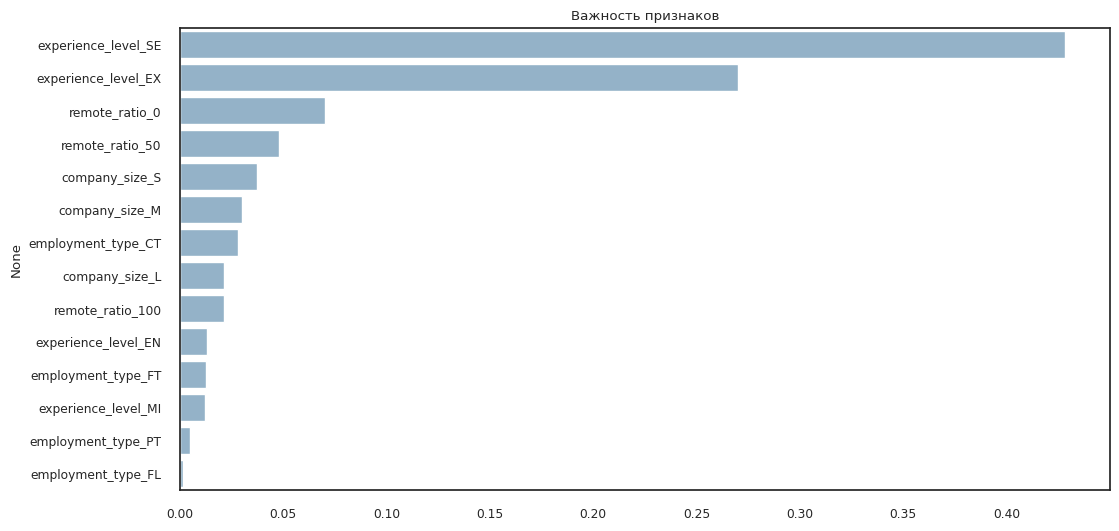

In [58]:
# Оценка важности признаков модели Random Forest
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Важность признаков")
plt.show()

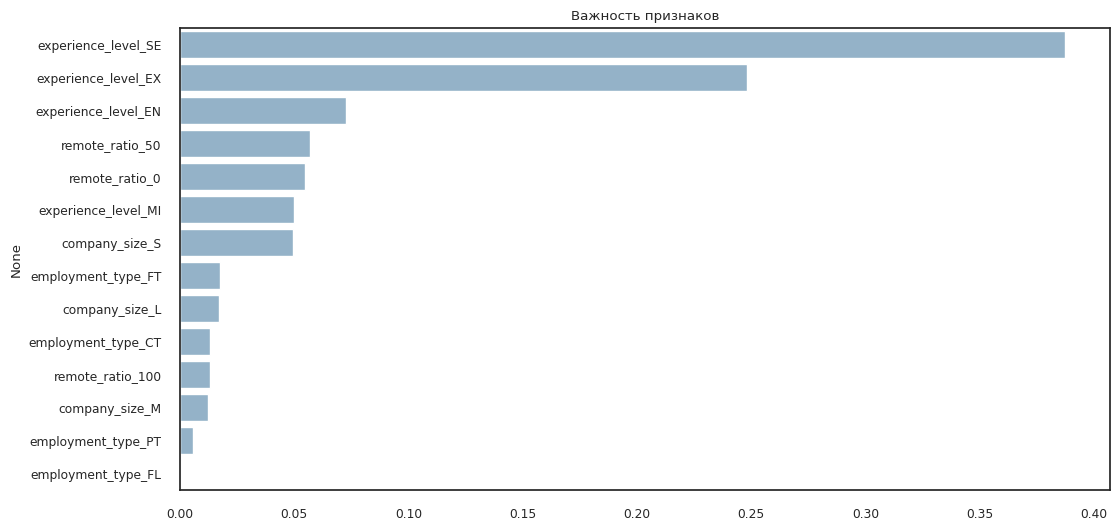

In [59]:
# Оценка важности признаков модели Gradient Boosting
importances = gb_model.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Важность признаков")
plt.show()

Применение методов пониженной размерности

In [60]:
# Применим метод главных компонент для уменьшения размерности набора данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # сохраняем 95% дисперсии
X_pca = pca.fit_transform(X_scaled)

print(f'Original shape: {X.shape}')
print(f'Transformed shape: {X_pca.shape}')

Original shape: (3755, 14)
Transformed shape: (3755, 10)


In [62]:
# Построим модель линейной регрессии с использованием данных PCA
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)

y_pred_pca = pca_model.predict(X_test_pca)

pca_rmse = np.sqrt(mean_squared_error(y_test, y_pred_pca))
pca_r_squared = r2_score(y_test, y_pred_pca)

print(f'PCA Linear Regression RMSE: {pca_rmse}')
print(f'PCA Linear Regression R-squared: {pca_r_squared}')

PCA Linear Regression RMSE: 0.9007727650597954
PCA Linear Regression R-squared: 0.18441227180033248


In [63]:
# Сравним качество модели с исходными данными
original_model = LinearRegression()
original_model.fit(X_train, y_train)

y_pred_original = original_model.predict(X_test)

original_rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))
original_r_squared = r2_score(y_test, y_pred_original)

print(f'Original Linear Regression RMSE: {original_rmse}')
print(f'Original Linear Regression R-squared: {original_r_squared}')

Original Linear Regression RMSE: 0.9007727650597955
Original Linear Regression R-squared: 0.18441227180033237


In [64]:
# Выведем резальтаты
print(f'PCA Linear Regression RMSE: {pca_rmse}, R-squared: {pca_r_squared}')
print(f'Original Linear Regression RMSE: {original_rmse}, R-squared: {original_r_squared}')

PCA Linear Regression RMSE: 0.9007727650597954, R-squared: 0.18441227180033248
Original Linear Regression RMSE: 0.9007727650597955, R-squared: 0.18441227180033237


Вывод

В целом обе модели работают одинаково хорошо, но исходная модель линейной регрессии имеет небольшое преимущество с точки зрения как среднеквадратической ошибки, так и коэффициента детерминации.

Результаты показывают, что, хотя метод главных компонент может быть полезен для уменьшения размерности, в данном случае он не улучшил точность прогнозирования заработной платы.

Кластеризация

In [65]:
# Применение кластеризации K-средних
X = processed_df_copy[['experience_level_EN', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
         'employment_type_CT', 'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
         'remote_ratio_0', 'remote_ratio_50', 'remote_ratio_100',
         'company_size_L', 'company_size_M', 'company_size_S',
          'job_category_Data Architecture', 'job_category_Data Engineering', 'job_category_Data Science',
          'job_category_Machine Learning', 'job_category_Management', 'job_category_Other']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

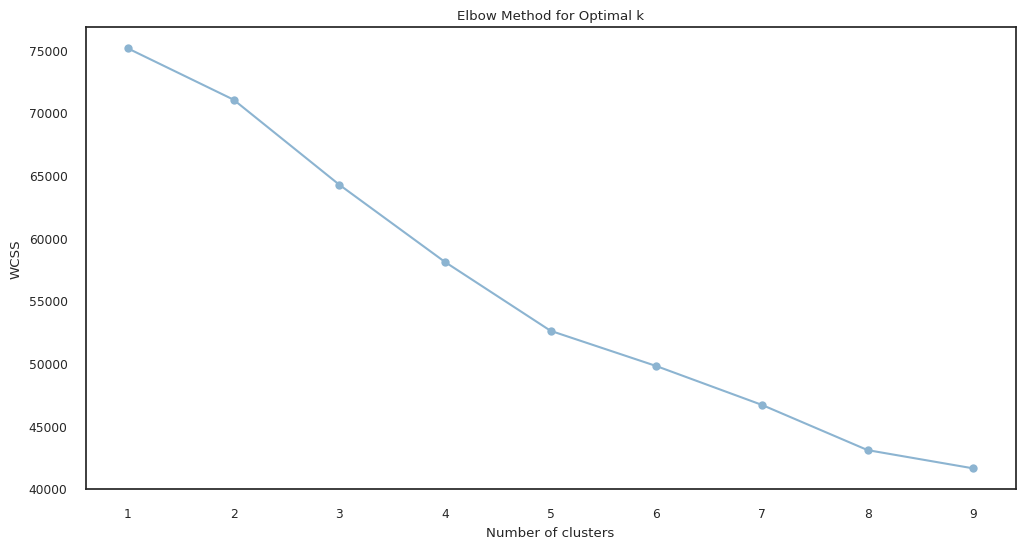

In [66]:
# Определение оптимального количества кластеров
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Построение кривого локтя
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [67]:
optimal_k = 8  # Замена на полученное оптимальное количество, основанное на графике. Мы выбрали 8.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Добавление меток кластеров в исходный датасет
processed_df_copy['Cluster'] = clusters

In [68]:
# Сгруппировка по кластерам и расчет среднего значения для каждого признака
cluster_analysis = processed_df_copy.groupby('Cluster').mean()
print(cluster_analysis)

         experience_level_EN  experience_level_EX  experience_level_MI  \
Cluster                                                                  
0                   0.000000             0.000000             1.000000   
1                   0.063100             0.067215             0.000000   
2                   0.040268             0.017450             0.000000   
3                   0.200000             0.000000             0.500000   
4                   0.070575             0.046688             0.000000   
5                   0.574913             0.024390             0.261324   
6                   0.000000             0.019048             0.066667   
7                   0.040268             0.000000             0.194631   

         experience_level_SE  employment_type_CT  employment_type_FL  \
Cluster                                                                
0                   0.000000            0.000000                 0.0   
1                   0.869684            0.0

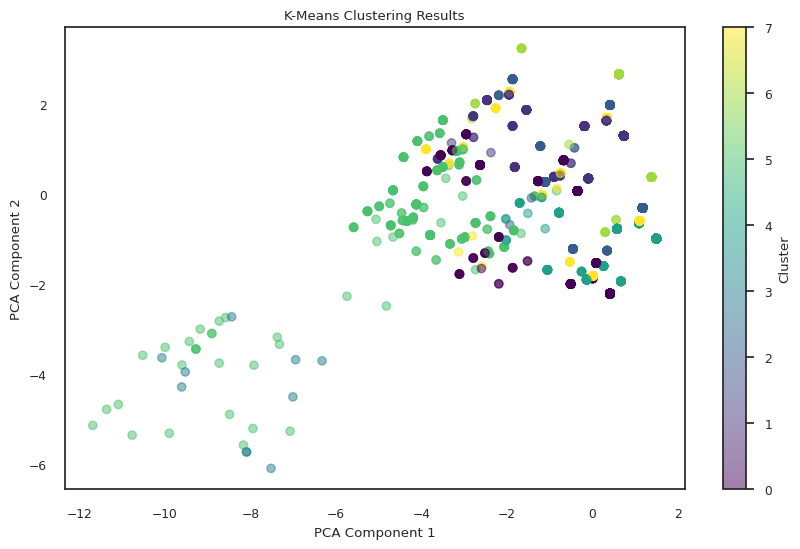

In [69]:
# Применение PCA, чтобы уменьшить размеры до 2 для визуализации.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Создание датасета с компонентами PCA и метками кластеров
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Построение графиков кластеров
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [70]:
silhouette = silhouette_score(X, clusters)
chi = calinski_harabasz_score(X, clusters)
print('\nK-Means')
print('_'*45 + '\n')
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))
rs_k = rand_score(kmeans.labels_, y)
print(" rand_score = {} \n\n {} из 3755 предсказано верно \n".format(rs_k, rs_k * 3755))


K-Means
_____________________________________________

Силуэт 0.385
Variance Rarion Criterion 538.82
 rand_score = 0.817953259975866 

 3071.4144912093766 из 3755 предсказано верно 



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received multiclass values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


На основе предоставленных метрик и результатов кластеризации с использованием алгоритма K-Means можно сделать следующие выводы:

### Метрики:
- **Силуэт (Silhouette Score): 0.385**
  - Значение около 0.385 указывает на умеренную разделенность кластеров. Обычно значения:
    - ближе к 1 — хорошо разделенные кластеры,
    - около 0 — кластеры пересекаются или плохо разделены,
    - отрицательные — объекты могут быть неправильно отнесены.
  - В нашем случае, умеренный показатель говорит о том, что кластеры имеют некоторую структуру, но есть место для улучшения.

- **Variance Ratio Criterion (Вариационный критерий): 538.82**
  - Этот показатель отражает качество кластеризации, где более высокие значения предполагают лучшее разделение.
  - Чем выше — тем лучше.

- **Rand Score: 0.818**
  - Значение близко к 1, что говорит о высокой согласованности кластеризации с эталонной разметкой.
  - Это хороший показатель, указывающий на то, что большинство объектов правильно сгруппированы.

### Предсказания:
- **3071 из 3755 объектов (примерно 81.8%)** были правильно классифицированы (или соответствуют эталонным кластерам).

### Итоги:
- Кластеризация с помощью K-Means показывает умеренное качество разделения, с хорошей согласованностью с истинной меткой (Rand Score ~0.82).
- Значение силуэта указывает, что кластеры не идеально разделены, но всё же имеют некоторую структуру.
- Большинство объектов (около 82%) были правильно отнесены, что говорит о достаточно хорошей эффективности модели.

ИТОГ:

Хотя кластеризация методом K-средних показала высокий индекс Рэнда и значительное количество правильных прогнозов, низкий показатель силуэта говорит о том, что кластеризация может быть улучшена. Критерий отношения дисперсий указывает на приемлемое качество кластера, но его следует интерпретировать наряду с другими показателями.
